In [1]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [3]:
def should_continue(state: MessagesState) -> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END



In [4]:
def call_model(state: MessagesState):
    messages  = state['messages']
    response = llm.invoke(messages)
    
    return {'messages': messages + [response]}

In [5]:
graph = StateGraph(MessagesState)

In [6]:
graph.add_node('agent', call_model)

In [7]:
# create and add search web tool

search_tool = TavilySearchResults(max_results=5)

tools = [search_tool]

tool_node = ToolNode(tools)

graph.add_node('tools', tool_node)

In [8]:
# This means that the first node is the agent
# similar to setting graph.set_entry_point('agent')
graph.add_edge(START, "agent")

In [9]:
graph.add_conditional_edges('agent', should_continue)

In [10]:
graph.add_edge('tools', 'agent')

In [11]:
graph_compiled = graph.compile()

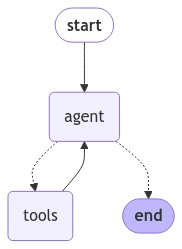

In [12]:
Image(graph_compiled.get_graph().draw_mermaid_png())

In [15]:
output = graph_compiled.invoke({'messages': [
    ('user', 'Write a simple report on how to use AI for productivity with reference for each section.')
]})

output

{'messages': [HumanMessage(content='Write a simple report on how to use AI for productivity with reference for each section.', id='a0e3b612-e235-4cfe-9b5d-5c1e1eda061d'),
  AIMessage(content='# Report on Using AI for Productivity\n\n## Introduction\nArtificial Intelligence (AI) has become an integral part of modern workplaces, enhancing productivity across various sectors. This report outlines how AI can be utilized to improve productivity, focusing on automation, data analysis, communication, and decision-making.\n\n## 1. Automation of Repetitive Tasks\nAI can automate mundane and repetitive tasks, allowing employees to focus on more strategic activities. Tools like robotic process automation (RPA) can handle tasks such as data entry, invoice processing, and scheduling.\n\n### Reference:\n- *Davenport, T. H., & Ronanki, R. (2018). "Artificial Intelligence for the Real World." Harvard Business Review.* This article discusses how organizations can implement AI to automate routine tasks,

In [16]:
from IPython.display import Markdown

Markdown(output['messages'][-1].content)

# Report on Using AI for Productivity

## Introduction
Artificial Intelligence (AI) has become an integral part of modern workplaces, enhancing productivity across various sectors. This report outlines how AI can be utilized to improve productivity, focusing on automation, data analysis, communication, and decision-making.

## 1. Automation of Repetitive Tasks
AI can automate mundane and repetitive tasks, allowing employees to focus on more strategic activities. Tools like robotic process automation (RPA) can handle tasks such as data entry, invoice processing, and scheduling.

### Reference:
- *Davenport, T. H., & Ronanki, R. (2018). "Artificial Intelligence for the Real World." Harvard Business Review.* This article discusses how organizations can implement AI to automate routine tasks, leading to increased efficiency.

## 2. Enhanced Data Analysis
AI algorithms can analyze vast amounts of data quickly and accurately, providing insights that can inform business decisions. Machine learning models can identify trends and patterns that may not be immediately apparent to human analysts.

### Reference:
- *Marr, B. (2018). "Data Strategy: How to Profit from a World of Big Data, Analytics and the Internet of Things." Kogan Page.* This book explains how businesses can leverage AI for data analysis to drive productivity and strategic decision-making.

## 3. Improved Communication
AI-powered tools, such as chatbots and virtual assistants, can enhance communication within teams and with customers. These tools can handle inquiries, schedule meetings, and provide instant responses, reducing the workload on human employees.

### Reference:
- *Gnewuch, U., Morana, S., & Maedche, A. (2017). "Towards Human-AI Collaboration in Customer Service: A Systematic Literature Review." Proceedings of the 38th International Conference on Information Systems (ICIS).* This paper reviews the impact of AI on communication and customer service, highlighting productivity gains.

## 4. Data-Driven Decision Making
AI can support decision-making processes by providing predictive analytics and recommendations based on historical data. This allows organizations to make informed decisions quickly, reducing the time spent on analysis.

### Reference:
- *Davenport, T. H. (2019). "The AI Advantage: How to Put the Artificial Intelligence Revolution to Work." MIT Press.* This book discusses how AI can enhance decision-making processes in organizations, leading to improved productivity.

## 5. Personalized Learning and Development
AI can tailor training programs to individual employee needs, enhancing skill development and productivity. By analyzing performance data, AI can recommend specific training resources and learning paths.

### Reference:
- *Baker, R. S., & Inventado, P. S. (2014). "Educational Data Mining and Learning Analytics." In Learning, Design, and Technology: An International Compendium of Theory, Research, Practice, and Policy.* This chapter discusses how AI can personalize learning experiences, contributing to employee productivity.

## Conclusion
The integration of AI into workplace processes can significantly enhance productivity by automating tasks, improving data analysis, facilitating communication, supporting decision-making, and personalizing learning. Organizations that leverage these AI capabilities are likely to see substantial improvements in efficiency and effectiveness.

## References
1. Davenport, T. H., & Ronanki, R. (2018). "Artificial Intelligence for the Real World." Harvard Business Review.
2. Marr, B. (2018). "Data Strategy: How to Profit from a World of Big Data, Analytics and the Internet of Things." Kogan Page.
3. Gnewuch, U., Morana, S., & Maedche, A. (2017). "Towards Human-AI Collaboration in Customer Service: A Systematic Literature Review." Proceedings of the 38th International Conference on Information Systems (ICIS).
4. Davenport, T. H. (2019). "The AI Advantage: How to Put the Artificial Intelligence Revolution to Work." MIT Press.
5. Baker, R. S., & Inventado, P. S. (2014). "Educational Data Mining and Learning Analytics." In Learning, Design, and Technology: An International Compendium of Theory, Research, Practice, and Policy.